In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Merged_Dataset.csv')

In [3]:
# Convert 'SignupDate' to datetime
df['SignupDate'] = pd.to_datetime(df['SignupDate'])

# Group by CustomerID to create summary statistics
customer_summary = df.groupby("CustomerID").agg({
    "TotalValue": "sum",
    "TransactionID": "count",
    "SignupDate": "first"
}).reset_index()

# Calculate customer tenure in days
customer_summary['CustomerTenure'] = (pd.to_datetime('today') - customer_summary['SignupDate']).dt.days

# Drop unnecessary columns
customer_summary.drop(columns=['CustomerID', 'SignupDate'], inplace=True)

# Display processed dataset
print(customer_summary.head())


   TotalValue  TransactionID  CustomerTenure
0     3354.52              5             932
1     1862.74              4            1079
2     2725.38              4             326
3     5354.88              8             841
4     2034.24              3             896


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_summary)


In [10]:
# Try Agglomerative Clustering with different cluster counts
for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k)
    agglo_clusters = agglo.fit_predict(X_scaled)
    
    db_index_agglo = davies_bouldin_score(X_scaled, agglo_clusters)
    print(f"Agglomerative K={k}, Davies-Bouldin Index: {db_index_agglo:.4f}")


Agglomerative K=2, Davies-Bouldin Index: 1.0714
Agglomerative K=3, Davies-Bouldin Index: 1.0979
Agglomerative K=4, Davies-Bouldin Index: 0.9127
Agglomerative K=5, Davies-Bouldin Index: 0.9153
Agglomerative K=6, Davies-Bouldin Index: 0.9683
Agglomerative K=7, Davies-Bouldin Index: 1.0780
Agglomerative K=8, Davies-Bouldin Index: 1.0952
Agglomerative K=9, Davies-Bouldin Index: 1.0737
Agglomerative K=10, Davies-Bouldin Index: 1.0478


In [12]:
# Assuming K-Means with optimal K was chosen (example for K=4)
optimal_k = 4
final_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
final_clusters = final_model.fit_predict(X_scaled)

customer_summary['Cluster'] = final_clusters

# Print cluster counts
print(customer_summary['Cluster'].value_counts())


Cluster
2    58
0    57
1    48
3    36
Name: count, dtype: int64


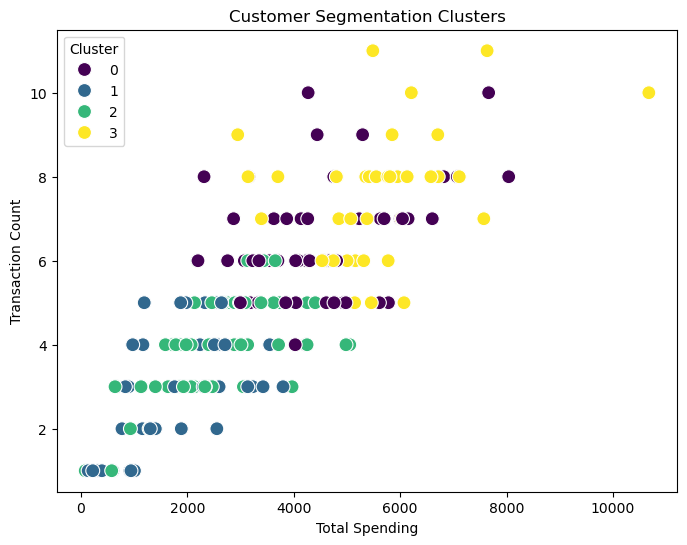

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=customer_summary['TotalValue'], 
                y=customer_summary['TransactionID'], 
                hue=customer_summary['Cluster'], 
                palette="viridis", 
                s=100)
plt.title("Customer Segmentation Clusters")
plt.xlabel("Total Spending")
plt.ylabel("Transaction Count")
plt.legend(title="Cluster")
plt.show()


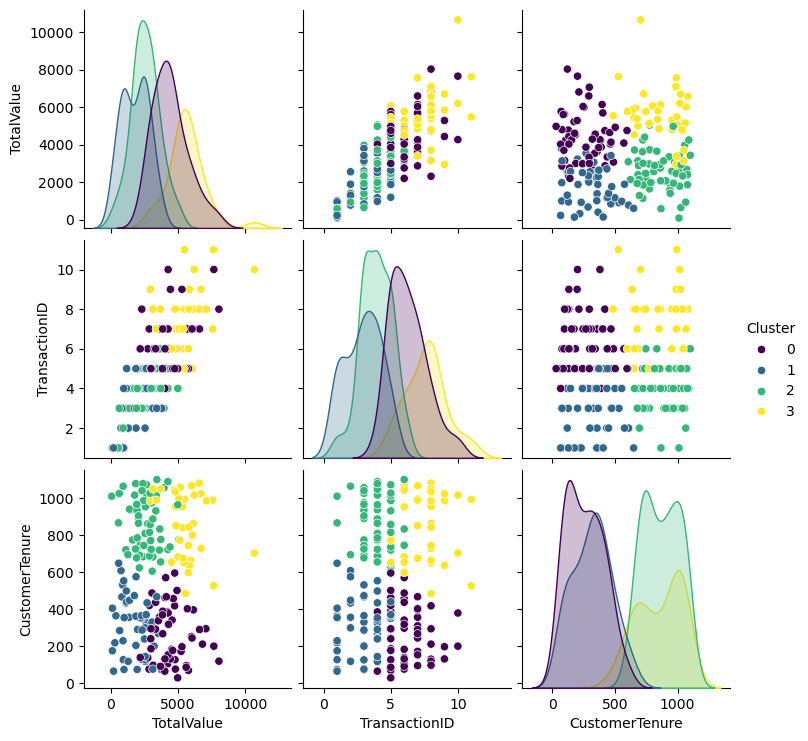

In [14]:
sns.pairplot(customer_summary, hue='Cluster', palette='viridis')
plt.show()
